In [229]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [230]:
'''
Készíts egy metódust ami a mnist adatbázisból betölti a train és test adatokat. (tf.keras.datasets.mnist.load_data())
Majd a tanitó, és tesztelő adatokat normalizálja, és vissza is tér velük.


Egy példa a kimenetre: train_images, train_labels, test_images, test_labels
függvény neve: mnist_digit_data
'''

'\nKészíts egy metódust ami a mnist adatbázisból betölti a train és test adatokat. (tf.keras.datasets.mnist.load_data())\nMajd a tanitó, és tesztelő adatokat normalizálja, és vissza is tér velük.\n\n\nEgy példa a kimenetre: train_images, train_labels, test_images, test_labels\nfüggvény neve: mnist_digit_data\n'

In [231]:
def mnist_digit_data():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    return (train_images, train_labels), (test_images, test_labels)

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [232]:
'''
Készíts egy neurális hálót, ami képes felismerni a kézírásos számokat.
A háló kimenete legyen 10 elemű, és a softmax aktivációs függvényt használja.
Hálon belül tetszőleges számú réteg lehet.


Egy példa a kimenetre: model,
return type: keras.engine.sequential.Sequential
függvény neve: mnist_model
'''

'\nKészíts egy neurális hálót, ami képes felismerni a kézírásos számokat.\nA háló kimenete legyen 10 elemű, és a softmax aktivációs függvényt használja.\nHálon belül tetszőleges számú réteg lehet.\n\n\nEgy példa a kimenetre: model,\nreturn type: keras.engine.sequential.Sequential\nfüggvény neve: mnist_model\n'

In [233]:

def mnist_model() ->tf.keras.Sequential:
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='softmax'),
    tf.keras.layers.Dense(10) 
    ])
    return model

In [234]:
'''
Készíts egy metódust, ami a bemeneti hálot compile-olja.
Optimizer: Adam
Loss: SparseCategoricalCrossentropy(from_logits=False)

Egy példa a bemenetre: model
Egy példa a kimenetre: model
return type: keras.engine.sequential.Sequential
függvény neve: model_compile
'''

'\nKészíts egy metódust, ami a bemeneti hálot compile-olja.\nOptimizer: Adam\nLoss: SparseCategoricalCrossentropy(from_logits=False)\n\nEgy példa a bemenetre: model\nEgy példa a kimenetre: model\nreturn type: keras.engine.sequential.Sequential\nfüggvény neve: model_compile\n'

In [235]:
def model_compile(model:tf.keras.Sequential)->tf.keras.Sequential:
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
    return model

In [236]:
'''
Készíts egy metódust, ami a bemeneti hálót feltanítja.

Egy példa a bemenetre: model,epochs, train_images, train_labels
Egy példa a kimenetre: model
return type: keras.engine.sequential.Sequential
függvény neve: model_fit
'''

'\nKészíts egy metódust, ami a bemeneti hálót feltanítja.\n\nEgy példa a bemenetre: model,epochs, train_images, train_labels\nEgy példa a kimenetre: model\nreturn type: keras.engine.sequential.Sequential\nfüggvény neve: model_fit\n'

In [237]:
def model_fit(model,epochs, train_images, train_labels)->tf.keras.Sequential:
    model.fit(train_images, train_labels, epochs)
    return model

In [238]:
'''
Készíts egy metódust, ami a bemeneti hálót kiértékeli a teszt adatokon.

Egy példa a bemenetre: model, test_images, test_labels
Egy példa a kimenetre: test_loss, test_acc
return type: float, float
függvény neve: model_evaluate
'''

'\nKészíts egy metódust, ami a bemeneti hálót kiértékeli a teszt adatokon.\n\nEgy példa a bemenetre: model, test_images, test_labels\nEgy példa a kimenetre: test_loss, test_acc\nreturn type: float, float\nfüggvény neve: model_evaluate\n'

In [250]:
def model_evaluate(model, test_images, test_labels)->(float and float):
    return model.evaluate(test_images,  test_labels, verbose=2)


(train_images, train_labels), (test_images, test_labels)=mnist_digit_data()

model=mnist_model()
model=model_compile(model)
model=model_fit(model,10,train_images,train_labels)
a,b=model_evaluate(model,test_images,test_labels)
print(b)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)


6000/6000 [==============================] - 4s 638us/step - loss: 2.3983 - accuracy: 0.1005
313/313 - 0s - loss: 2.3014 - accuracy: 0.0993 - 236ms/epoch - 753us/step
0.09929999709129333
313/313 [==============================] - 0s 526us/step


In [240]:
predictions[10]
np.argmax(predictions[3])

8

In [241]:
test_labels[10] 

0

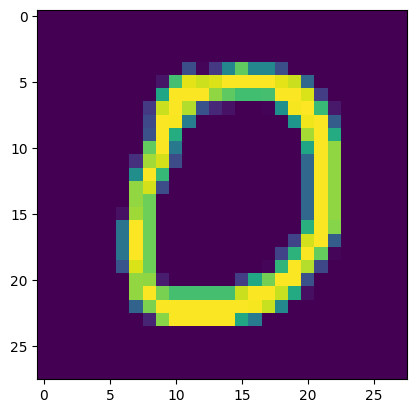

In [242]:
plt.imshow(test_images[10])
plt.show()

In [243]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

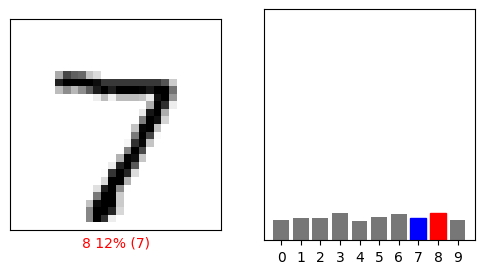

In [244]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)


In [245]:
plt.show()

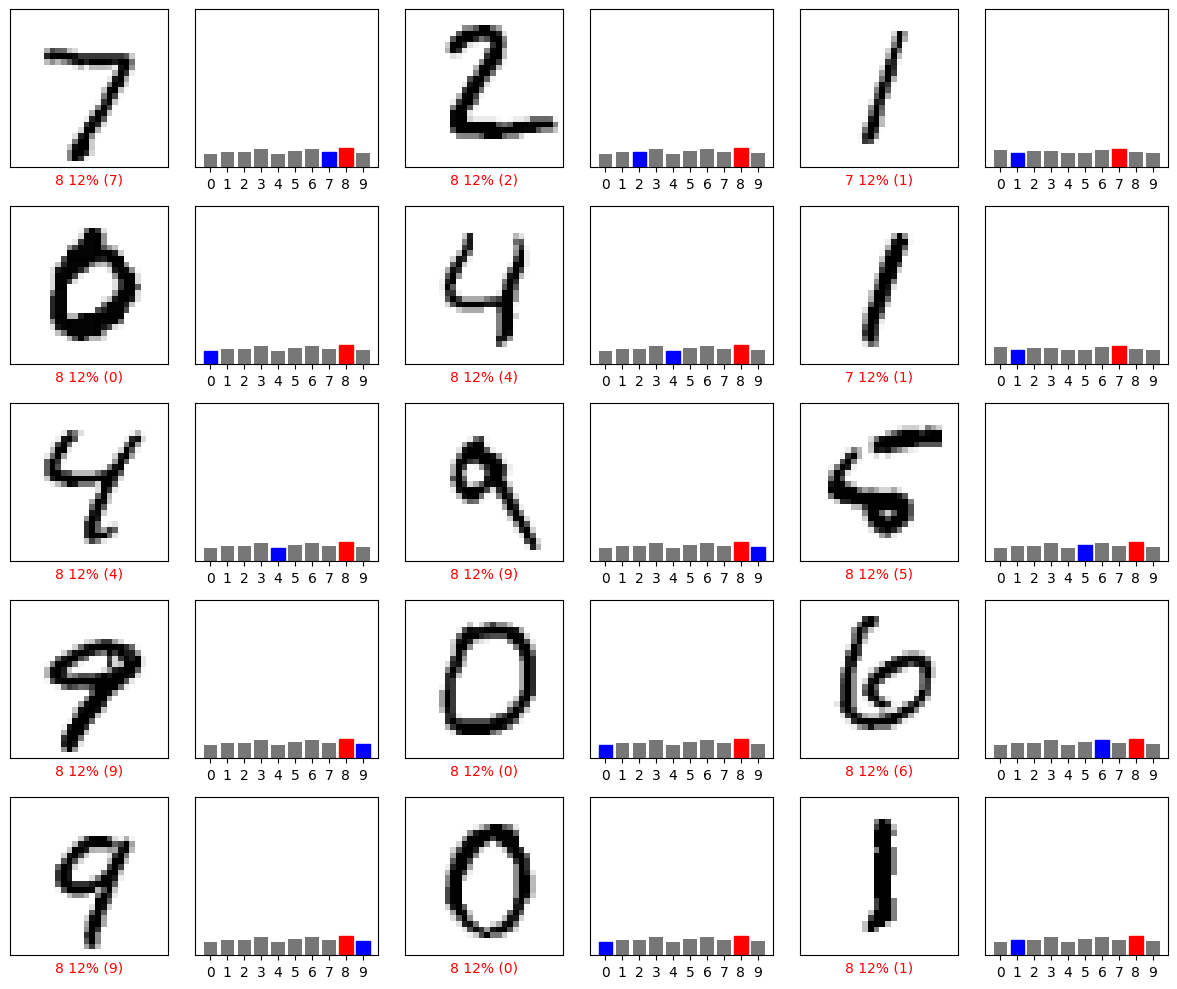

In [246]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()